# TheGraph data access
We plan to visualize and monitor the flow of delegated stake, total delegation pool and indexer allocation process. 

The current data come from [event data subgraph](https://thegraph.com/explorer/subgraph/fordn/graph-network-events?selected=playground)

More research plan see [hackmd](https://hackmd.io/@Jiajia20/BkOoEZODd)


## visualization
- request GraphQL data API -> JSON -> PANDAS
- the current subgraph seemd only load the first 200 record (even if I specify first:1000)
- I'm able to load 200 at a time and combine them with 'first, skip' 

## To do
- [x]get specitialty subgraph
- [] double check pagination problem


In [1]:
import json
import requests
import pandas as pd

## 0 - Allocation Data of Indexer


In [6]:

url = 'https://api.thegraph.com/subgraphs/name/fordn/graph-network-events'

query = """query{
  allocationCreateds(first: 1000) {
    id
    blockTime
    indexer
    subgraphDeploymentID
    epoch
    tokens
    allocationID
  }  
}"""
r = requests.post(url, json = {'query':query})
p = json.loads(r.content)

#create pandas df
json_data = json.loads(r.text)
df_data = json_data['data']['allocationCreateds']
df4 = pd.DataFrame(df_data)

df4.insert(0, 'type', 'allocationCreateds')
df4 = df4.sort_values(by=['blockTime'],ascending=True)
#df4.to_csv('stakeDelegateds.csv', index = False, header=True)


In [7]:
url = 'https://api.thegraph.com/subgraphs/name/fordn/graph-network-events'

query = """query{
  allocationCollecteds(first: 1000) {
    id
    blockTime
    indexer
    subgraphDeploymentID
    epoch
    tokens
    allocationID
    from
    curationFees
    rebateFees
  }
  
}"""
r = requests.post(url, json = {'query':query})
p = json.loads(r.content)

#create pandas df
json_data = json.loads(r.text)
df_data = json_data['data']['allocationCollecteds']
df5 = pd.DataFrame(df_data)

df5.insert(0, 'type', 'allocationCollecteds')
df5 = df5.sort_values(by=['blockTime'],ascending=True)
#df4.to_csv('stakeDelegateds.csv', index = False, header=True)

## 1 - delegated stake

### Delegated Stakes in df

In [8]:
#thanks to @Markus for the code and @Ford for the new subgraph


url = 'https://api.thegraph.com/subgraphs/name/fordn/graph-network-events'

query = """query{
  stakeDelegateds (first:1000) {
    id
    blockTime
    indexer
    delegator
    tokens
    shares
  }
}"""
r = requests.post(url, json = {'query':query})
p = json.loads(r.content)

#create pandas df
json_data = json.loads(r.text)
df_data = json_data['data']['stakeDelegateds']
df = pd.DataFrame(df_data)



In [9]:
df.insert(0, 'type', 'stakeDelegates')


In [10]:
df = df.sort_values(by=['blockTime'],ascending=True)
df.to_csv('stakeDelegateds.csv', index = False, header=True)

### Locked Stake in df2

In [11]:

url = 'https://api.thegraph.com/subgraphs/name/fordn/graph-network-events'

query = """query{
  stakeDelegatedLockeds(first:1000) {
    id
    blockTime
    eventTime
    indexer
    delegator
    tokens
    shares
    until
  }
 }"""
r = requests.post(url, json = {'query':query})
p = json.loads(r.content)

#create pandas df
import pandas as pd
json_data = json.loads(r.text)
df_data = json_data['data']['stakeDelegatedLockeds']
df2 = pd.DataFrame(df_data)

In [12]:
df2.insert(0,'type','stakeDelegatedLockeds')


In [13]:
df2 = df2.sort_values(by=['blockTime'],ascending=True)
df2.to_csv('stakeDelegatedLockeds.csv', index = False, header=True)

### WithDraw in df3

In [14]:
url = 'https://api.thegraph.com/subgraphs/name/fordn/graph-network-events'

query = """query{stakeDelegatedWithdrawns (first:1000) {
    id
    blockTime
    indexer
    delegator
    tokens
}
}"""
r = requests.post(url, json = {'query':query})
p = json.loads(r.content)

#create pandas df
import pandas as pd
json_data = json.loads(r.text)
df_data = json_data['data']['stakeDelegatedWithdrawns']
df3 = pd.DataFrame(df_data)
 
 

In [15]:
df3.insert(0,'type','stakeDelegatedWithdrawns')

In [16]:
df3 = df3.sort_values(by=['blockTime'],ascending=True)
df3.to_csv('stakeDelegatedWithdrawns.csv', index = False, header=True)

### Merge and vis
Adding column
- [merging with concat](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
- [insert columns](https://stackoverflow.com/questions/29517072/add-column-to-dataframe-with-constant-value)

deal with duplicate
- [insert index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)
- [result row index](https://stackoverflow.com/questions/19609631/python-changing-row-index-of-pandas-data-frame)
- [drop duplicate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

visualization
- [plot with multiple line](https://stackoverflow.com/questions/29233283/plotting-multiple-lines-in-different-colors-with-pandas-dataframe)
- [pandas native](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

type cast
- [casting string](https://datatofish.com/string-to-integer-dataframe/)
- use `float` for bigger numbers


In [17]:
# frames = [df, df2, df3]
frames = [df, df2, df3,df4,df5]
result = pd.concat(frames)
result

,type,blockTime,delegator,id,indexer,shares,tokens,eventTime,until,allocationID,epoch,subgraphDeploymentID,curationFees,from,rebateFees
375,stakeDelegates,1608262679,0xb7797cb7b4a031c4c1e04ea14824fa5d8d30beed,0x07f058e4212ea4115857cd68ed38d6eba0a8fc84977c...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,39800000000000000000000,39800000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,stakeDelegates,1608263358,0x6c615cb1e310d0909698ef4992958d849bf4a45c,0x106191a769d4ba4690aeb8f366a1ffb00f500c03ecc6...,0x4fedde33607cfda2c82a999accb427d1170987d9,33167330000000000000000,33167330000000000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,stakeDelegates,1608269302,0x7eb692f22af33d637aab31f9277653235682ebe6,0x11d12e4e40232247ba695bb303b0ea709873707de2cb...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,4002893379514657642500,4002893379514657642500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,stakeDelegates,1608291242,0xcee87b725581b494b6b741105f8a4acba80082da,0x1478bd439a671285e34dbeacd9d907270719308ec162...,0x9238584c74e5fa445a8f72a4d4ef4699dd783852,7042604687446462930000,7042604687446462930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,stakeDelegates,1608294293,0x795f50722cf5ad82f78dda8dc8f7b235332977c3,0x0b6977f0cc00e06d12e273a8d66cc99f318096d2d1d3...,0x9238584c74e5fa445a8f72a4d4ef4699dd783852,37810000000000000000000,37810000000000000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,allocationCollecteds,1619931788,NaN,0x0a59b8052305715a77c61ba0eeed19c07af9a21f0f6f...,0x7ddf0c8cb0167870bf7cc5368792c93aeeb15430,NaN,6100000000000000,NaN,NaN,0x92be903a9b4e5b11e8fd7aa84827dcfb39d13bae,136,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,603900000000000,0x9fd8ac559219d4dd463193d1fb0433f7844f730f,5435100000000000
545,allocationCollecteds,1619931788,NaN,0x1232b74774d093305d9bb7ad88a8bfcbdb390f5fc90a...,0xbd1a939b4e4125254013a0c4573252be2fd9d207,NaN,14023231273599389484,NaN,NaN,0xb5bf904ba2c19ceb106c6047539868763e9f5f05,136,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,1388299896086339559,0x9fd8ac559219d4dd463193d1fb0433f7844f730f,12494699064777056031
605,allocationCollecteds,1619931788,NaN,0x145c4a743cc6e55c7f75498581b7c8c4636fc2324a98...,0x7ddf0c8cb0167870bf7cc5368792c93aeeb15430,NaN,6100000000000000,NaN,NaN,0x92be903a9b4e5b11e8fd7aa84827dcfb39d13bae,136,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,603900000000000,0x9fd8ac559219d4dd463193d1fb0433f7844f730f,5435100000000000
940,allocationCollecteds,1619931790,NaN,0x1dac9b9a7b9a5532f793c577ddcd02c85a911dc7da01...,0x6dae84e4aed2c8708707b358e278408c2deb0397,NaN,10949270000000000000,NaN,NaN,0x774dbc835c5a0312dbf407d1d5114fcdca88d093,136,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,1083977730000000000,0x9fd8ac559219d4dd463193d1fb0433f7844f730f,9755799570000000000


In [19]:
result.to_csv('merged.csv', index = False, header=True)

In [21]:
type(df.blockTime[0])

str

In [ ]:
type(2288500000000000000000)

In [10]:
import numpy as np
result['blockTime'] = result['blockTime'].astype(int)
result['tokens'] = result['tokens'].astype(float)
#result['tokens'] = pd.to_numeric(result['tokens'])
result = result.sort_values('blockTime')



In [11]:
import matplotlib.pyplot as plt

#result_p  = result.drop_duplicates(subset=['blockTime'])
result.set_index(['blockTime', 'delegator', 'indexer'], append=True)
result
result.insert(0,'index_2',0)
result.index_2 = range(3000)

In [12]:
result

,index_2,type,blockNumber,blockTime,delegator,id,indexer,shares,tokens,eventTime,until
373,0,stakeDelegatedLockeds,11474621,1608260777,0x57b4a5f470c85d4281f7baf5162b59243a3491df,0x18cb0cf3c94ed5aee7c925b9691535fb78e0419d54e3...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,65257075000000000000000,6.525707e+22,1608260777,32
375,1,stakeDelegates,11474769,1608262679,0xb7797cb7b4a031c4c1e04ea14824fa5d8d30beed,0x07f058e4212ea4115857cd68ed38d6eba0a8fc84977c...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,39800000000000000000000,3.980000e+22,NaN,NaN
762,2,stakeDelegates,11474819,1608263358,0x6c615cb1e310d0909698ef4992958d849bf4a45c,0x106191a769d4ba4690aeb8f366a1ffb00f500c03ecc6...,0x4fedde33607cfda2c82a999accb427d1170987d9,33167330000000000000000,3.316733e+22,NaN,NaN
321,3,stakeDelegatedLockeds,11474886,1608264240,0x1853bf6a892abd949aed052bb634ab96afaf31dd,0x14b0c8979f1f246960a4145a594db37a7a440082451e...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,14169714085664846000000,1.416971e+22,1608264240,32
843,4,stakeDelegates,11475238,1608269302,0x7eb692f22af33d637aab31f9277653235682ebe6,0x11d12e4e40232247ba695bb303b0ea709873707de2cb...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,4002893379514657642500,4.002893e+21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
70,2995,stakeDelegatedWithdrawns,12404610,1620622904,0x0b5e60685297eb5348de573d5d9b3c669deb4e94,0x05f9d356ee2e38e729554d89f59f356375984f742ebd...,0x5a8904be09625965d9aec4bffd30d853438a053e,NaN,2.225893e+23,NaN,NaN
393,2996,stakeDelegatedWithdrawns,12405183,1620629954,0x966b4d523fb6a4b88071f918b35e360c8326e7d8,0x23319a2373bf68f7ab1954f404e6c7cbe4f69f46e7a9...,0x5a8904be09625965d9aec4bffd30d853438a053e,NaN,4.357788e+22,NaN,NaN
362,2997,stakeDelegatedWithdrawns,12405480,1620633810,0x60b6c90ee835207fe0d82fe7b782e8e58e70d77a,0x1f8a50f3bb4ae971b96d1e6aacc81dc6c2f330e33cdf...,0x9238584c74e5fa445a8f72a4d4ef4699dd783852,NaN,1.140503e+22,NaN,NaN
646,2998,stakeDelegatedWithdrawns,12406969,1620654727,0x440efbba3f3d971fd8411c580197ecb53ef71f87,0x3bc4f127bef64df57e2c2f2cf0b5b5521bacca32984f...,0x5a8904be09625965d9aec4bffd30d853438a053e,NaN,1.011843e+22,NaN,NaN


<AxesSubplot:>

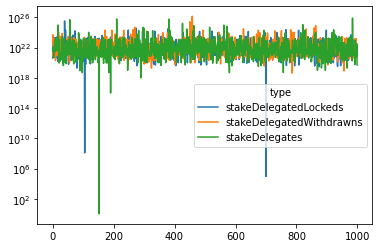

In [13]:
result = result.pivot( columns='type', values='tokens')


result.plot(logy=True)

## 2 - Graph Visualization

In [6]:
import networkx as nx
def pd_to_graph(df):
    G = nx.from_pandas_edgelist(df,
                            source='delegator',
                            target='indexer',
                            edge_key='id',
                            create_using=nx.MultiDiGraph(),
                            edge_attr=True)
    
    unique_indexer = df.indexer.unique()
    for i in unique_indexer:
        G.nodes[i]['type'] = 'indexer'

    unique_delegator = df.delegator.unique()   
    for i in unique_delegator:
        G.nodes[i]['type'] = 'delegator'
    return(G)

In [7]:
G = pd_to_graph(df)
G

In [8]:
nx.degree(G)

DiMultiDegreeView({'0x1df0a5bfced8fb5b9eda72e6e500f44292792e76': 1, '0x5a8904be09625965d9aec4bffd30d853438a053e': 300, '0x317e5b109b97bf4222f163884257e9c6a42d755a': 1, '0xbe9d7c691792937ca7e2535652886ff390cc5b86': 34, '0x445ea1ccb8c2c984647484ca9bf0d08adafced60': 1, '0x4bc2e066fb0857493a1fbe48462bb34ff6ea731f': 2, '0xf2e9fb0e1ffcdc0dca2f39aa2e2245375bccf3e5': 1, '0xd22c1c1a1fc452e3312489f1e89676e93c3323f0': 11, '0xad6ee7c40d7d80a6c404e82e77cde5c5088e98a5': 5, '0x2c313e9fd1794685d2052af79457c858813b108f': 3, '0x9af906c01f75154dd3402dfa441c7a4251c3201f': 1, '0x88cd037eda1808449e59a27e161dd667c05ad91a': 2, '0x1d79706378ea91067fa574b30ea139b00000d15d': 1, '0xe7a694696a4d11ac0b7ab2dcb99a7fcf200eb00b': 10, '0x271271e6c59d4e47d67cd7ac13f8d0232fa4c919': 2, '0xb06071394531b63b0bac78f27e12dc2beaa913e4': 79, '0xa31d6dd6ef05356910b680bf60a13aba6a04435b': 1, '0x281a3a5b478c7c77460edd39dff561494f923f9a': 1, '0x4d6a8776a164776c93618233a0003e8894e7e6c2': 11, '0xbecfbd38ad4e13968007ea56678504e738bda8a9

## 3 - Explore
1. block number and block time are interchangable measurement of time, but a more crose measure of action timestep. Namely if two transaction happpens in the same block, it will be represented with the same block number and block time, and the actual order of how they happen as unknown in the Graph's framework (futher detail might be searchable in projets like Ether Scan)

2. event time is NOT unique either

3. 

### 3.1 Block number

In [ ]:
df.sort_values('blockNumber')

#search for duplicate
df2 = df[['blockNumber','blockTime']]
df2[df2.duplicated()]

#examine duplicate
df.loc[[203, 812,949]]
df[df.blockNumber == '11520282']
df[df.blockNumber == '11727669']
df[df.blockNumber == '11727669']

#small number of indexer, and relatively large number of delegators
df.delegator.nunique()
df.id.nunique()

#block numbers are string, to plot and order need to be cast into integers
type(df.blockNumber[0])
df.blockNumber.plot()

In [ ]:
(df2.eventTime.nunique(), df2.blockTime.nunique())

### 3.2 unique delegator and indexer

In [ ]:
df2["inde_del"] = df2["indexer"] + df2["delegator"]
df2['inde_del'].nunique()
df2[df2.inde_del.duplicated()]

In [ ]:

r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)

In [ ]:
len(df)

## This is what we want it to look like

In [ ]:
subgraph_tvl.head()

Dealing with pagination here is a pain and the `query` string above does not actually run in the explorer as written. In order to make it easier to move back and forth between the [explorer](https://thegraph.com/explorer/subgraph/balancer-labs/balancer) and the python environment we should build a function to run the same query we use in the explorer, for example:
```
{pools(first:1000){
        id
        liquidity
    }
}
```



In [ ]:
def query_theGraph(raw_query, field_name, url, verbose=False, hardcap=5000):

    query_parts =raw_query.split(')')
    paginator = ", skip:{}"
    #this expectes the raw query to gave a `first:1000` term
    n = 0
    records = []
    while True:
        print(f'request {n+1}')
        skipper = paginator.format(n*1000)
        query = 'query '+query_parts[0]+skipper+')'+query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            d = json.loads(r.content)['data'][field_name]
        except:
            #print(r.content)
            errors = json.loads(r.content)['errors']
            #print(errors)
            for e in errors:
                print(e['message'])

        print(f'results {len(d)}')
        records.extend(d)
        print(f'total {len(records)}')
        
        if n*1000>hardcap:
            break
        
        n += 1
        if len(d) < 1000:
            break
        
    return pd.DataFrame(records)

In [ ]:
raw_query = '''{pools(first:1000){
        id
        liquidity
    }
}

'''
field_name = 'pools'

subgraph_tvl2 = query_theGraph(raw_query, field_name, url, True)

In [ ]:
subgraph_tvl2

In [ ]:
subgraph_tvl2.head()

In [ ]:
subgraph_tvl2.columns = ['id','liquidity2'] 

In [ ]:
checker = subgraph_tvl.merge(subgraph_tvl2)

In [ ]:
checker['matches'] = checker.liquidity==checker.liquidity2

In [ ]:
checker.matches.describe()

Now that have checked the data we can proceed with some exploratory analysis.

In [ ]:
subgraph_tvl.liquidity= subgraph_tvl.liquidity.apply(float)

In [ ]:
subgraph_tvl.sort_values('liquidity', inplace=True)

In [ ]:
subgraph_tvl.liquidity

In [ ]:
plt_df=subgraph_tvl[subgraph_tvl.liquidity>1].copy().sort_values('liquidity', ascending=False)

In [ ]:
subgraph_tvl.describe()

In [ ]:
plt_df.tail()

In [ ]:
plt_df.plot(x='id', y='liquidity', logy=True)
plt.xticks(rotation=90)

In [ ]:
plt_df['cumulative liquidity'] = plt_df.liquidity.cumsum()

In [ ]:
plt_df.plot(x='id', y='cumulative liquidity', logy=False)
plt.xticks(rotation=90)